In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("boston.csv");
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [19]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


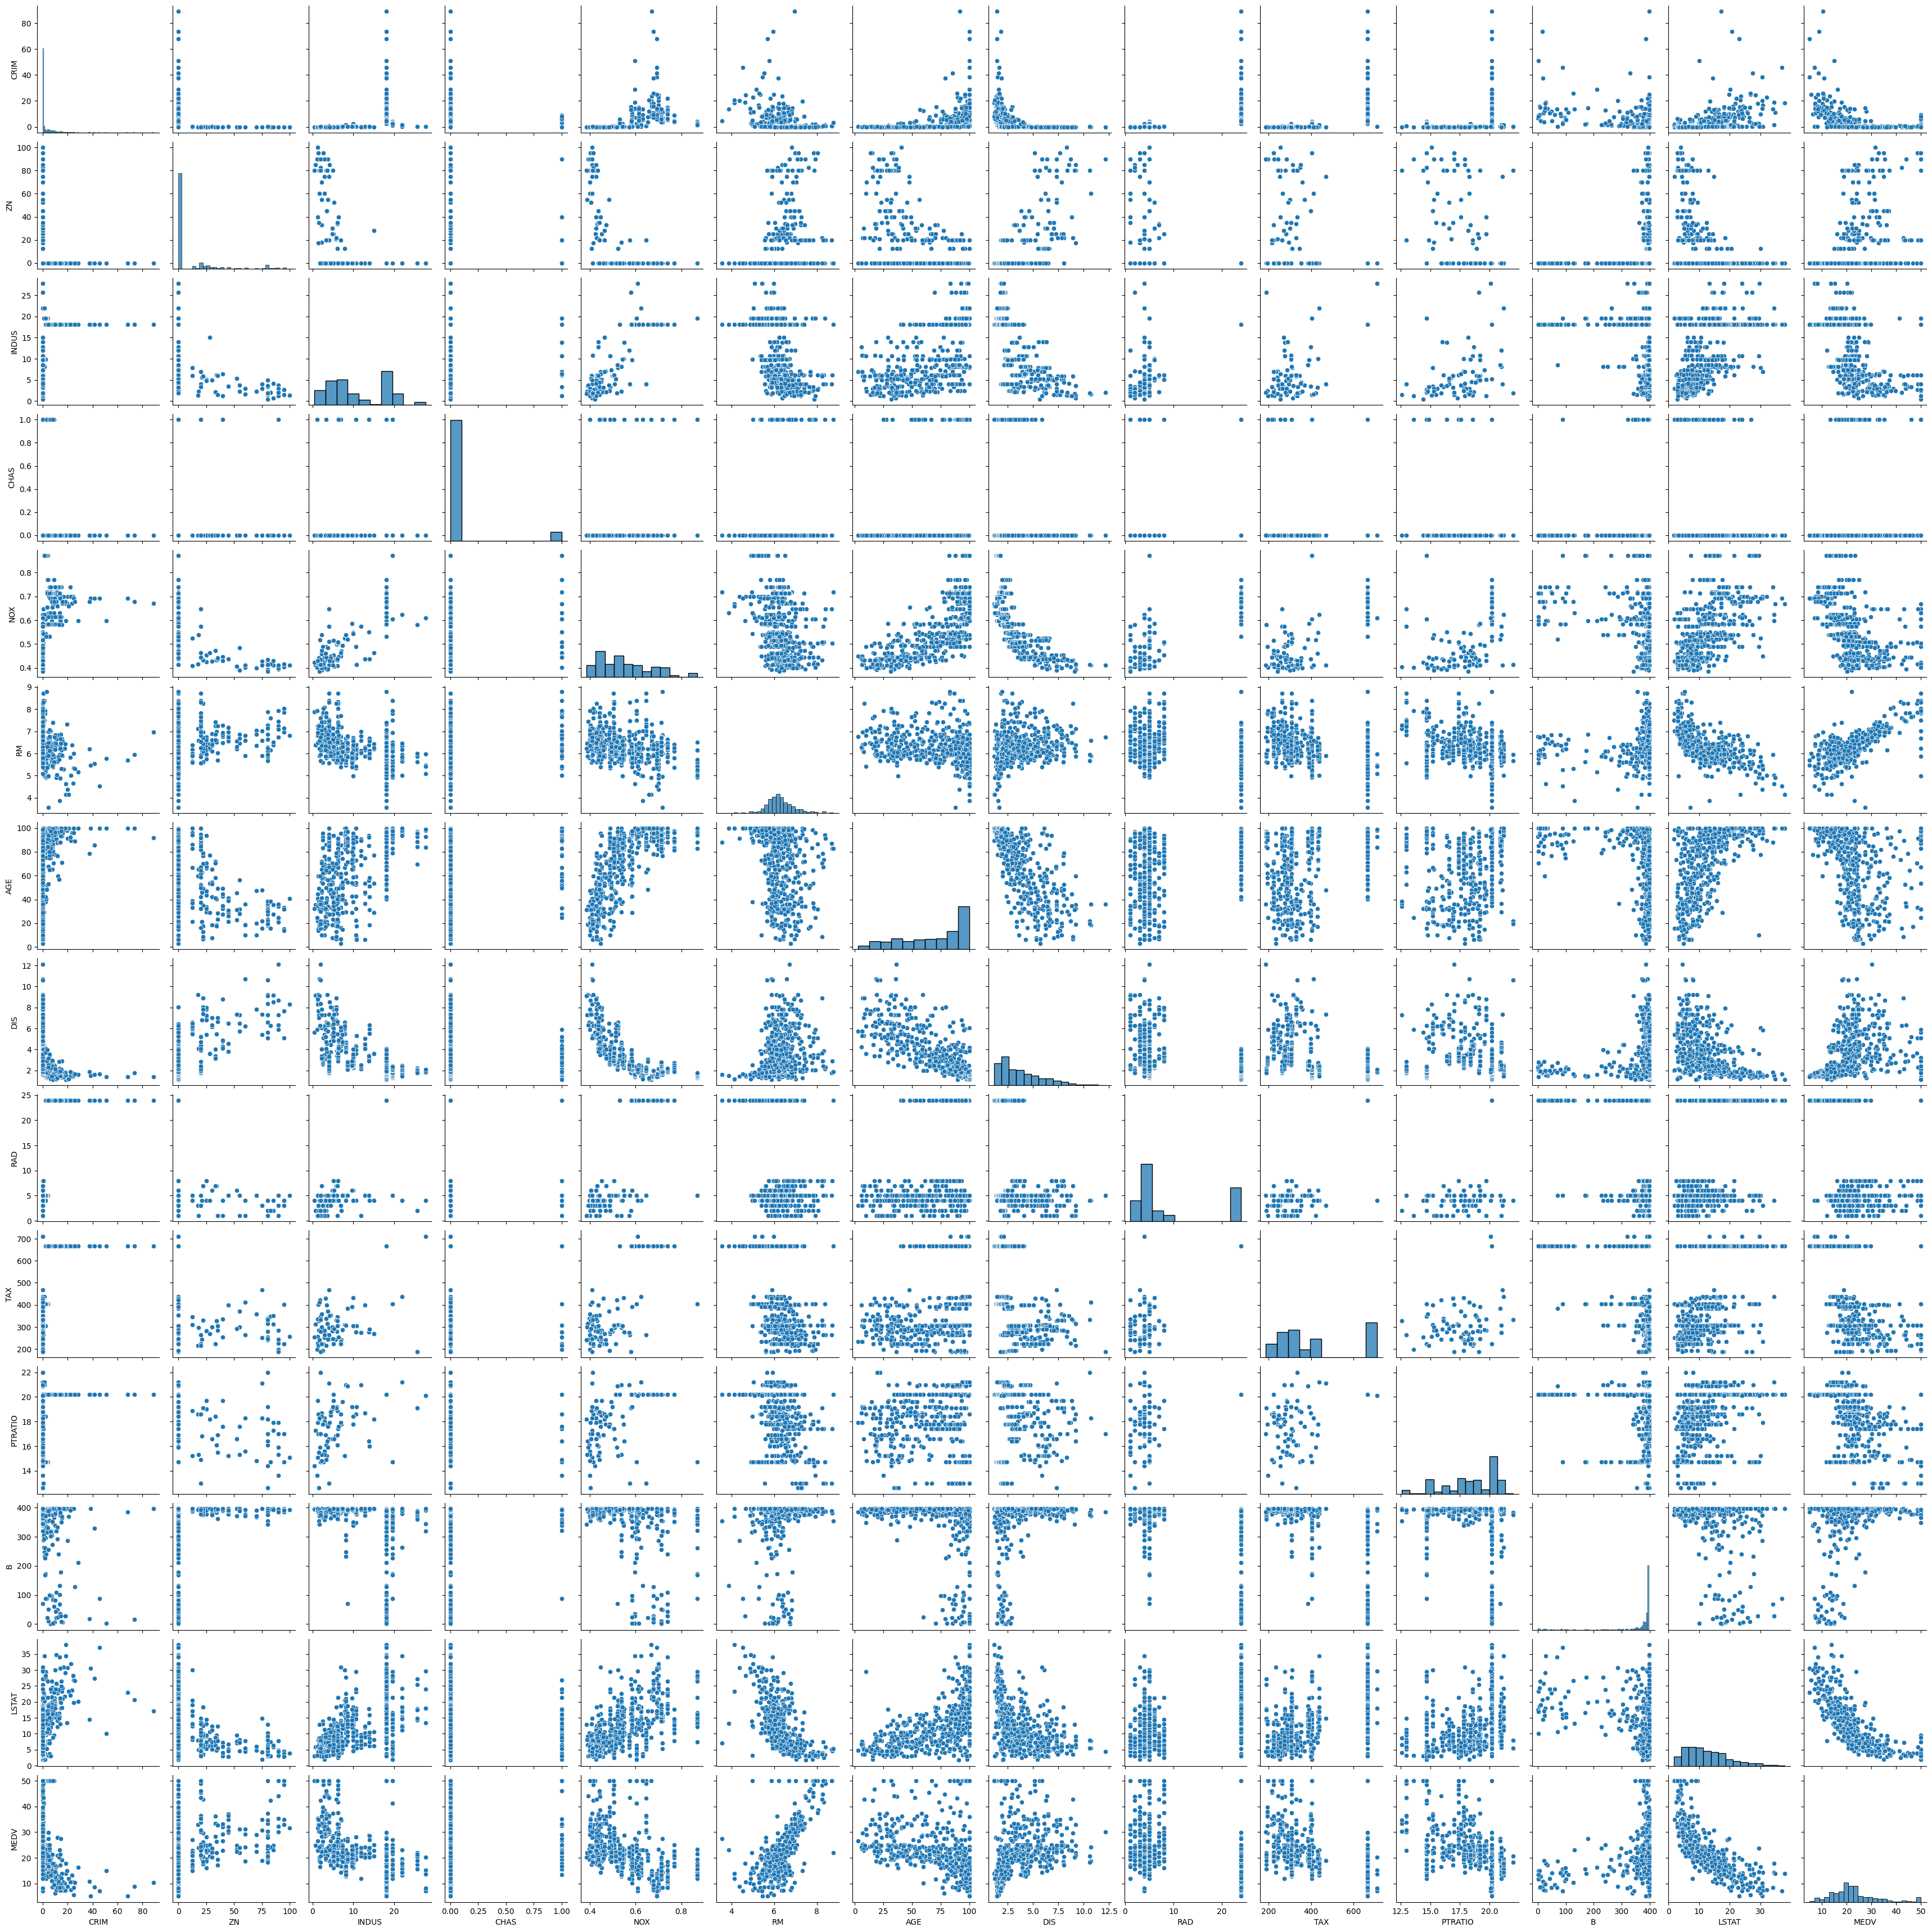

In [35]:
sns.pairplot(df)

<Axes: >

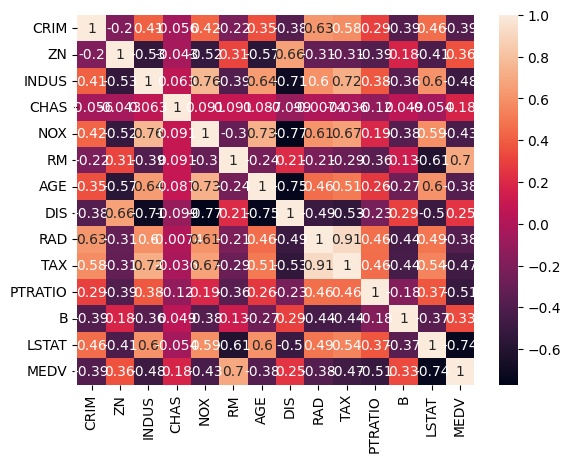

In [9]:
sns.heatmap(df.corr(),annot=True)

In [40]:
sns.histplot(df["INDUS"],bins=30,kde=True)

<Axes: xlabel='INDUS', ylabel='Count'>

In [11]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [39]:
X=df[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX']]
y=df['INDUS']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.40,random_state=101)

In [42]:
X_train

CRIM    ZN  CHAS    NOX     RM   AGE      DIS  RAD    TAX
181  0.06888   0.0     0  0.488  6.144  62.2   2.5979    3  193.0
297  0.14103   0.0     0  0.437  5.790  58.0   6.3200    4  289.0
433  5.58107   0.0     0  0.713  6.436  87.9   2.3158   24  666.0
211  0.37578   0.0     1  0.489  5.404  88.6   3.6650    4  277.0
60   0.14932  25.0     0  0.453  5.741  66.2   7.2254    8  284.0
..       ...   ...   ...    ...    ...   ...      ...  ...    ...
63   0.12650  25.0     0  0.453  6.762  43.4   7.9809    8  284.0
326  0.30347   0.0     0  0.493  6.312  28.9   5.4159    5  287.0
337  0.03041   0.0     0  0.515  5.895  59.6   5.6150    5  224.0
11   0.11747  12.5     0  0.524  6.009  82.9   6.2267    5  311.0
351  0.07950  60.0     0  0.411  6.579  35.9  10.7103    4  411.0

[303 rows x 9 columns]

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lm=LinearRegression()

In [45]:
lm.fit(X_train,y_train)

LinearRegression()

In [46]:
coeff_df=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [47]:
coeff_df

Coefficient
CRIM    -0.011498
ZN      -0.035804
CHAS     1.068584
NOX     14.799581
RM      -0.945524
AGE      0.008716
DIS     -0.651502
RAD     -0.279097
TAX      0.028305

In [49]:
predections=lm.predict(X_test)

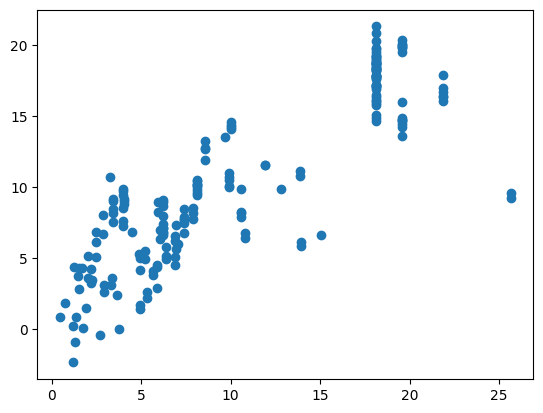

In [50]:
plt.scatter(y_test,predections)

In [51]:
sns.distplot((y_test-predections),bins=50)

C:\Users\jayba\AppData\Local\Temp\ipykernel_16568\3513913488.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predections),bins=50)


<Axes: xlabel='INDUS', ylabel='Density'>